In [1]:
from mesh import *

from VPINN_tri_final import *

from PROBDEF import PROBDEF


2023-12-13 14:55:45.893489: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-13 14:55:45.895002: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-13 14:55:45.933038: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-13 14:55:45.933669: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-13 14:55:46.785819: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co


my_types lib imported

generate mesh lib imported

interpolator_lib imported

settings_lib imported 



In [2]:
def plot_BC(u_exact, u_NN_BC_):
    """both numpy functions"""
    x = np.linspace(0, 1, 200, dtype=np.float64)

    eval_exact = [u_exact(x[i], 1.0) for i in range(len(x))]

    eval_net = [u_NN_BC_(x[i], 1.0) for i in range(len(x))]

    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    plt.figure(figsize=(10,7))  # Set the figure size

    # Plot the data
    plt.subplot(221)   
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("top edge")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.0) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.0) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(223)    
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("bottom edge")
    plt.legend()

    eval_exact = [u_exact(1.0, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(1.0, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(222)    
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("right edge")
    plt.legend()

    eval_exact = [u_exact(0.0, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(0.0, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(224)   
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("left edge")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.5) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.5) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    plt.figure(figsize=(10, 7))  # Set the figure size

    # Plot the data
    plt.subplot(221)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice at y=0.5")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.25) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.25) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(222)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice at y=0.25")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.75) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.75) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(223)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice y=0.75")
    plt.legend()

    eval_exact = [u_exact(0.5, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(0.5, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(224)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice x=0.50")
    plt.legend()


    eval_exact = [u_exact(0.25, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(0.25, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

def helper_colour_plot(x, y, model):

    x_=tf.reshape(x,(-1,1))
    y_=tf.reshape(y,(-1,1))

    eval=tf.concat([x_,y_],axis=1)

    return tf.reshape(model(eval),(tf.shape(x)[0],-1))

def color_plot(model):

    x = np.linspace(0, 1, 1000)
    y = np.linspace(0, 1, 1000)

    X, Y = np.meshgrid(x, y)

    error = np.abs(pb.u_exact(X,Y)-helper_colour_plot(X,Y,model))

    fig=plt.imshow(
        error,
        extent=[min(x), max(x), min(y), max(y)],
        vmin=np.min(error),
        vmax=np.max(error)
    )

    plt.title('Error Map')
    plt.colorbar(fig)

    fig.axes.set_autoscale_on(False)

# VPINN  with neumann and dirichlet 

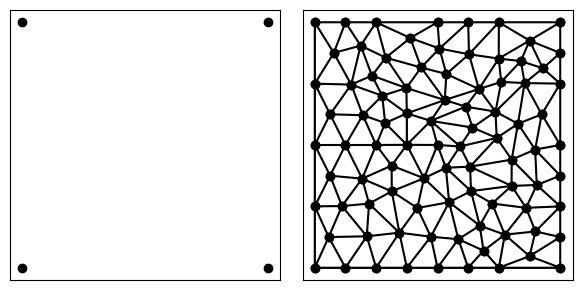

In [6]:
initializer=tf.keras.initializers.GlorotUniform(seed=50)
domain=((0,0),(1,0),(1,1),(0,1))
mesh=generate_mesh(domain,0.01,'NDND')

## Dirichlet dof

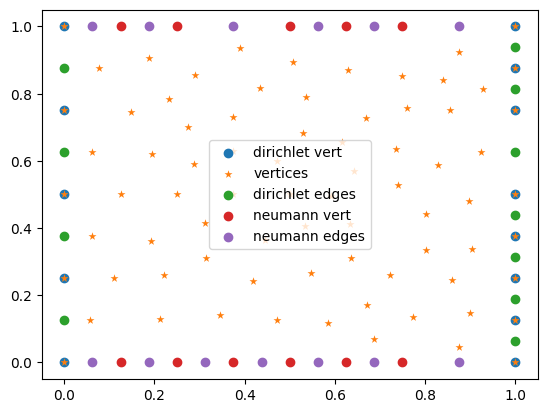

In [7]:
dirichlet=mesh['vertices'][mesh['vertex_markers'][:,0]==1]
dirichlet_edges=mesh['edges'][mesh['edge_markers'][:,0]==1]

neumann=mesh['vertices'][mesh['vertex_markers'][:,0]==2]
neumann_edges=mesh['edges'][mesh['edge_markers'][:,0]==2]

plt.scatter(dirichlet[:,0],dirichlet[:,1])
plt.scatter(mesh['vertices'][:,0],mesh['vertices'][:,1],marker='*',linewidths=0.01)

middle_=mesh['vertices'][dirichlet_edges[:,1]]+mesh['vertices'][dirichlet_edges[:,0]]
middle_=middle_/2
plt.scatter(middle_[:,0],middle_[:,1])

plt.scatter(neumann[:,0],neumann[:,1])
middle=mesh['vertices'][neumann_edges[:,1]]+mesh['vertices'][neumann_edges[:,0]]
middle=middle/2
plt.scatter(middle[:,0],middle[:,1])

plt.legend(['dirichlet vert ','vertices','dirichlet edges','neumann vert','neumann edges'])


In [5]:
print(mesh['edge_markers'])

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [2]
 [0]
 [2]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]


In [6]:
print(mesh['vertex_markers'])

[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [2]
 [0]
 [1]
 [0]
 [0]
 [2]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [2]
 [2]
 [1]
 [0]
 [0]
 [2]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]


In [7]:
B=interpolator(2,False,False,None)

## Net building

In [8]:
tfk=tf.keras
tfkl=tf.keras.layers

In [9]:
#glorot uniform is the key 
model = tfk.models.Sequential()
model.add(tf.keras.Input(shape=(2,),dtype=tf.float64))
model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))

In [10]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                150       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5301 (41.41 KB)
Trainable params: 5301 (41.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [10]:
N_tests = 2

pb=PROBDEF()

params = {'scheme': 'VPINNs',
            'N_test':N_tests}

In [11]:
#neumann call 

temp=np.hstack([np.zeros_like(B.neumann_nodes),B.neumann_nodes],dtype=np_type)


res=pb.neumann(temp[:,0],temp[:,1])

print(np.shape(res))

print(np.sum(B.neumannn_weights))

NameError: name 'B' is not defined

In [13]:
print(mesh['vertex_markers'])

[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [2]
 [0]
 [1]
 [0]
 [0]
 [2]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [2]
 [2]
 [1]
 [0]
 [0]
 [2]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]


In [12]:
vp=VPINN(pb,params,mesh,model)

writing3 -->  [2] [37 43 42]
[[0.02387078]
 [0.12151859]
 [0.28054559]
 [0.47521895]
 [0.67399078]
 [0.84464472]
 [0.95952094]
 [1.        ]
 [0.95952094]
 [0.84464472]
 [0.67399078]
 [0.47521895]
 [0.28054559]
 [0.12151859]
 [0.02387078]] 0.125 [[0.06238565]
 [0.06190381]
 [0.06106218]
 [0.05990202]
 [0.05847935]
 [0.05686117]
 [0.05512121]
 [0.05333578]
 [0.05157974]
 [0.0499232 ]
 [0.04842893]
 [0.04715061]
 [0.04613181]
 [0.04540565]
 [0.04499472]]
writing3 -->  [2] [28 29 18]
[[0.02387078]
 [0.12151859]
 [0.28054559]
 [0.47521895]
 [0.67399078]
 [0.84464472]
 [0.95952094]
 [1.        ]
 [0.95952094]
 [0.84464472]
 [0.67399078]
 [0.47521895]
 [0.28054559]
 [0.12151859]
 [0.02387078]] 0.125 [[0.01571817]
 [0.01611476]
 [0.01682317]
 [0.01783306]
 [0.01912575]
 [0.02067144]
 [0.02242672]
 [0.02433309]
 [0.02631721]
 [0.02829315]
 [0.03016665]
 [0.03184114]
 [0.03322497]
 [0.03423884]
 [0.034823  ]]
writing1 -->  [0] [28  3 26]
[[0.02387078]
 [0.12151859]
 [0.28054559]
 [0.47521895]
 

In [29]:
print(vp.mesh['vertex_markers'])

[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [2]
 [0]
 [1]
 [0]
 [0]
 [2]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [2]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [2]
 [2]
 [1]
 [0]
 [0]
 [2]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]


In [14]:
x=vp.mesh['vertex_markers']
val=vp.F_total_vertices

for i in range(len(x)):
    print(x[i],'->',val[i])

[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[2] -> tf.Tensor([0.01015625], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[2] -> tf.Tensor([0.00517578], shape=(1,), dtype=float64)
[1] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[2] -> tf.Tensor([0.00031752], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], sha

In [15]:
x=vp.mesh['edge_markers']
val=vp.F_total_edges

for i in range(len(x)):
    print(x[i],'->',val[i])

[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)
[0] -> tf.Tensor([0.], shape=(1,), dtype=float64)


In [17]:
select=np.zeros((vp.b.n,1),dtype=np_type)
select[2]=1.0


In [18]:
def wrapper(X,Y,select):
    points=[[X[i,j],Y[i,j]] for j in range(100) for i in range(100) ]
    points=np.array(points)
    res=vp.b.interpolate(points,select)
    return np.reshape(res,(100,100))

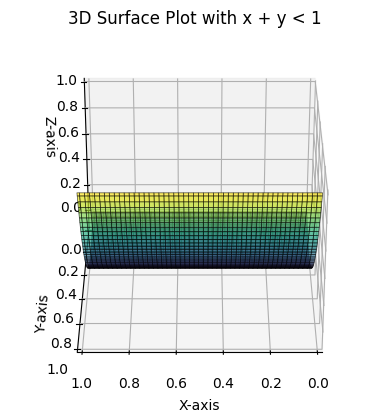

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

select=np.zeros((vp.b.n,1),dtype=np_type)
select[1]=1.0

# Generate x and y values
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

# Create a meshgrid from x and y
X, Y = np.meshgrid(x, y)


Z = wrapper(X, Y,select) 

# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, linewidth=0.5, edgecolor='k')

# Add labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Surface Plot with x + y < 1')

ax.view_init(elev=30, azim=90)

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Show the plot
plt.show()


[[0.00600374 0.        ]
 [0.0313633  0.        ]
 [0.07589671 0.        ]
 [0.13779113 0.        ]
 [0.21451391 0.        ]
 [0.30292433 0.        ]
 [0.39940295 0.        ]
 [0.5        0.        ]
 [0.60059705 0.        ]
 [0.69707567 0.        ]
 [0.78548609 0.        ]
 [0.86220887 0.        ]
 [0.92410329 0.        ]
 [0.9686367  0.        ]
 [0.99399626 0.        ]]
[[0.99399626 0.00600374]
 [0.9686367  0.0313633 ]
 [0.92410329 0.07589671]
 [0.86220887 0.13779113]
 [0.78548609 0.21451391]
 [0.69707567 0.30292433]
 [0.60059705 0.39940295]
 [0.5        0.5       ]
 [0.39940295 0.60059705]
 [0.30292433 0.69707567]
 [0.21451391 0.78548609]
 [0.13779113 0.86220887]
 [0.07589671 0.92410329]
 [0.0313633  0.9686367 ]
 [0.00600374 0.99399626]]
[[0.         0.99399626]
 [0.         0.9686367 ]
 [0.         0.92410329]
 [0.         0.86220887]
 [0.         0.78548609]
 [0.         0.69707567]
 [0.         0.60059705]
 [0.         0.5       ]
 [0.         0.39940295]
 [0.         0.30292433

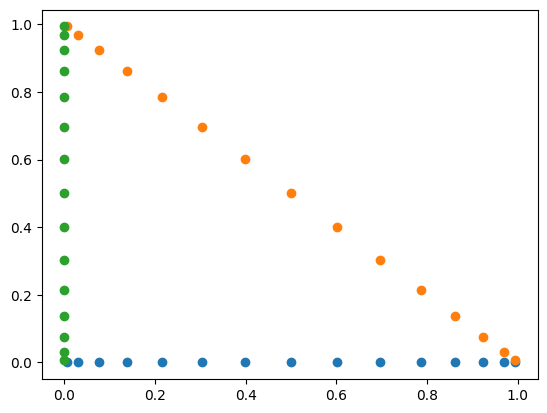

In [20]:
neumann_points_ref=vp.b.neumann_nodes
neumann_weights_ref=vp.b.neumannn_weights


points_edge1=np.hstack([neumann_points_ref,np.zeros_like(neumann_points_ref)],dtype=np_type)
points_edge2=np.hstack([1.0-neumann_points_ref,neumann_points_ref],dtype=np_type)
points_edge3=np.hstack([np.zeros_like(neumann_points_ref),neumann_points_ref[::-1]],dtype=np_type)

print(points_edge1)
print(points_edge2)
print(points_edge3)

plt.scatter(points_edge1[:,0],points_edge1[:,1])
plt.scatter(points_edge2[:,0],points_edge2[:,1])
plt.scatter(points_edge3[:,0],points_edge3[:,1])


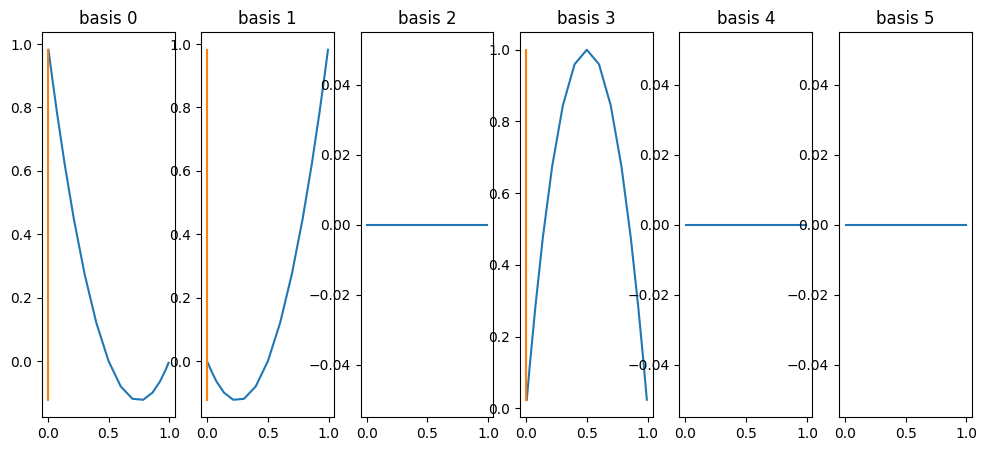

In [26]:
points=vp.b.nodes
points=np.array(points)

fig, axs = plt.subplots(1, 6, figsize=(12, 5))

for i in range(6):
    select=np.zeros((vp.b.n,1),dtype=np_type)
    select[i]=1.0

    eval=vp.b.interpolate(points_edge1,select)

    axs[i].plot(points_edge1,eval)
    axs[i].set_title('basis '+str(i))

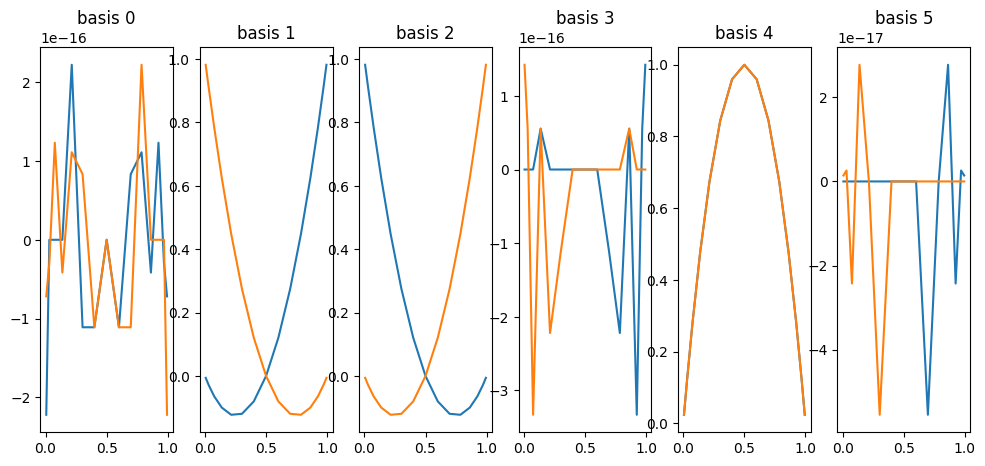

In [27]:
points=vp.b.nodes
points=np.array(points)

fig, axs = plt.subplots(1, 6, figsize=(12, 5))

for i in range(6):
    select=np.zeros((vp.b.n,1),dtype=np_type)
    select[i]=1.0

    eval=vp.b.interpolate(points_edge2,select)

    axs[i].plot(points_edge2,eval)
    axs[i].set_title('basis '+str(i))

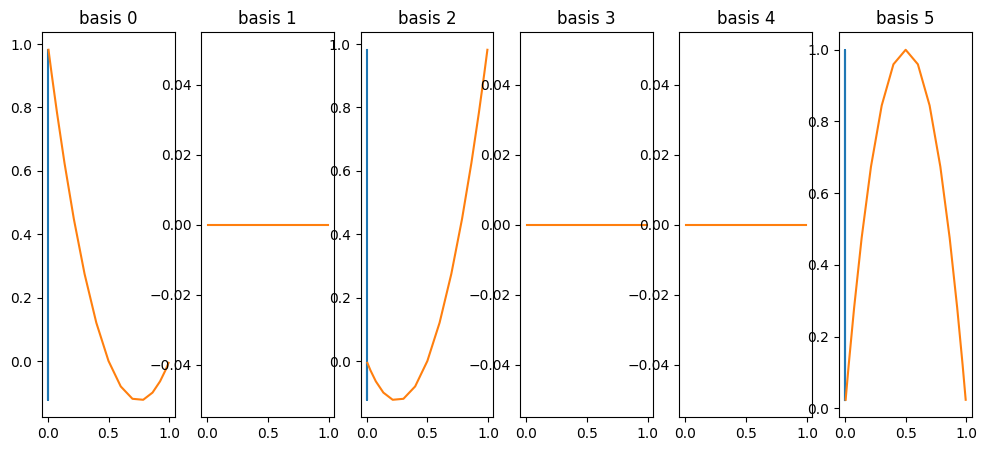

In [28]:
points=vp.b.nodes
points=np.array(points)

fig, axs = plt.subplots(1, 6, figsize=(12, 5))

for i in range(6):
    select=np.zeros((vp.b.n,1),dtype=np_type)
    select[i]=1.0

    eval=vp.b.interpolate(points_edge3,select)

    axs[i].plot(points_edge3,eval)
    axs[i].set_title('basis '+str(i))

## Pre-trained BC

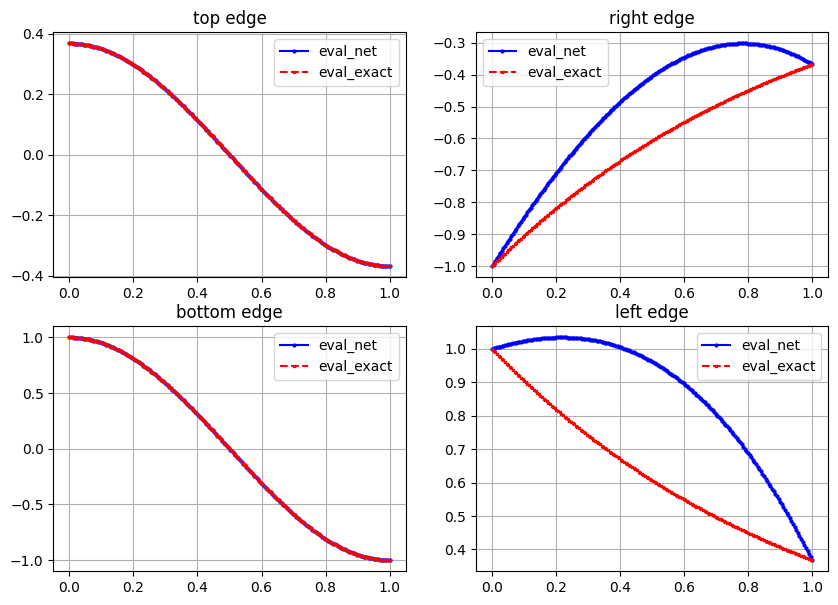

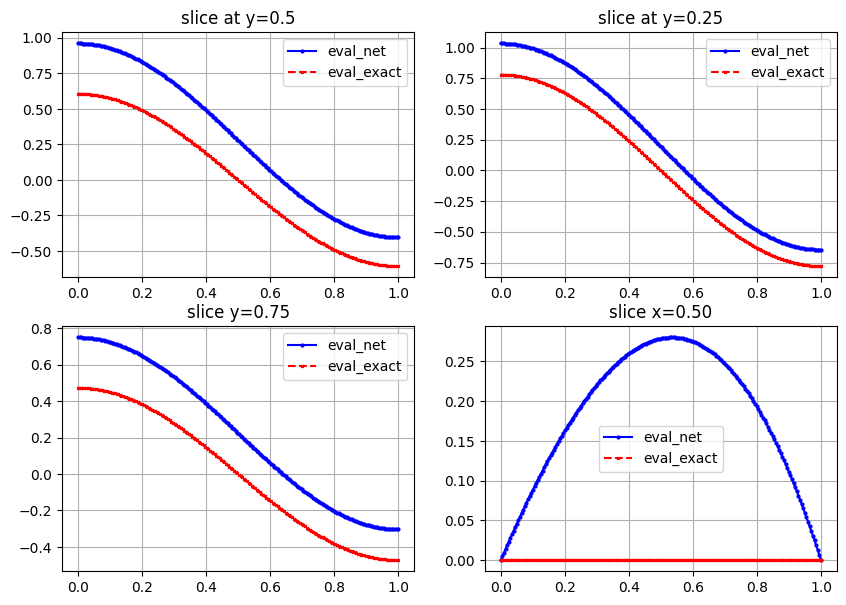

In [22]:
plot_BC(pb.u_exact,vp.u_NN_BC______________)

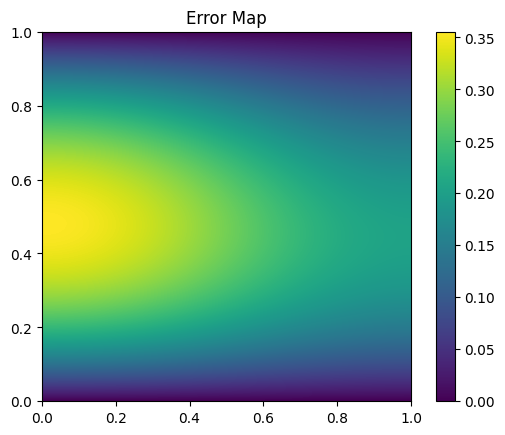

In [23]:
color_plot(vp.NN_imposeBC)

## Training

In [24]:
#print(find_h(mesh)) #biggest and smaller of the edges 
history=vp.train(1000,0.001)

KeyboardInterrupt: 

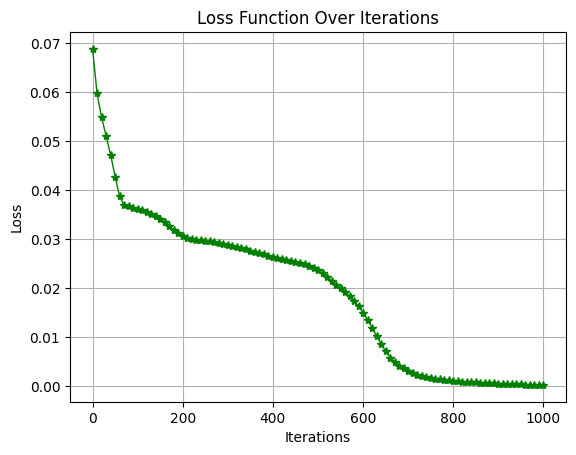

In [ ]:
iterations = range(0, len(history) * 10, 10)  # Assuming losses are provided every 10 iterations

plt.plot(iterations, history, marker='*',color='green',linewidth=1)
plt.title('Loss Function Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

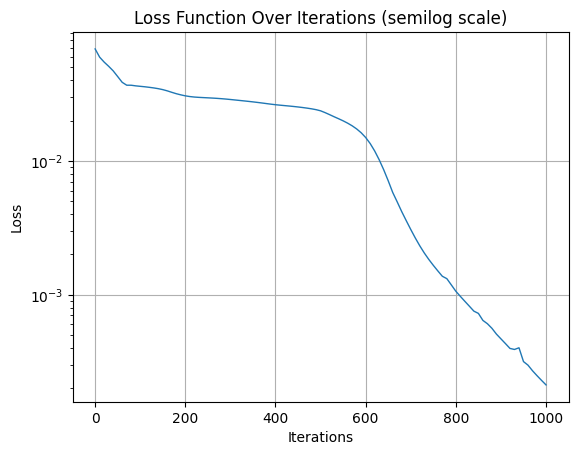

In [ ]:
plt.semilogy(iterations, history,linewidth=1)
plt.title('Loss Function Over Iterations (semilog scale)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

## Plotting slices

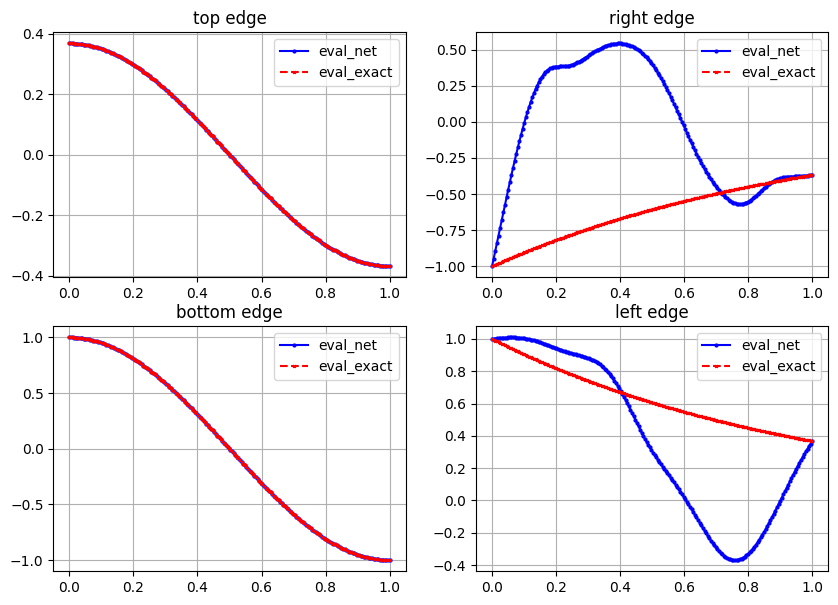

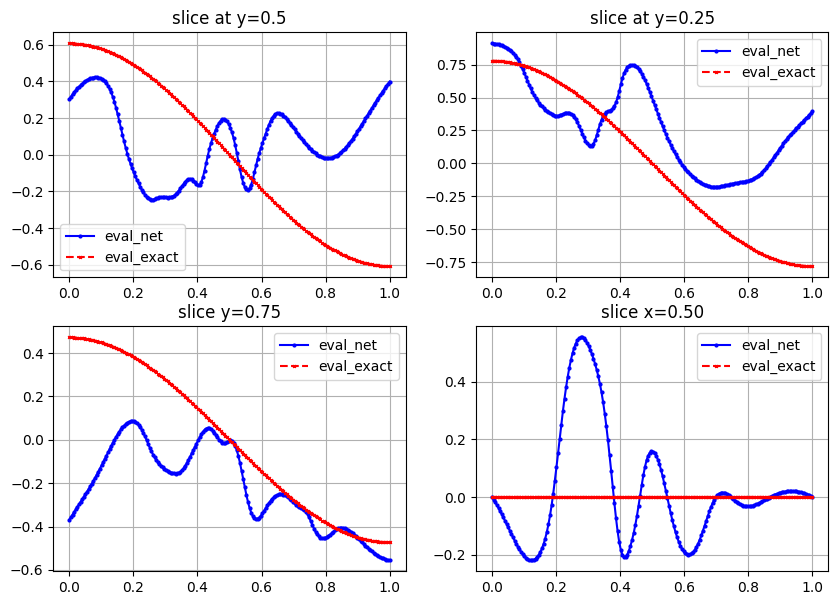

In [ ]:
plot_BC(pb.u_exact,vp.u_NN_BC______________)

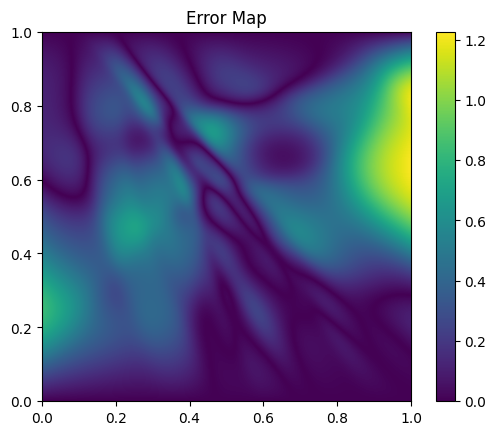

In [ ]:
color_plot(vp.NN_imposeBC)


## Errors

In [ ]:
#integration
from scipy.integrate import dblquad
integral,error=dblquad(lambda x,y: (pb.u_exact(x,y)-vp.u_NN_BC______________(x,y))**2, 0.0, 1.0,0.0, 1.0)

L2_error=np.sqrt(integral)
print(L2_error,error)


def L2_error(x, y):

    u_ex = lambda x, y: tf.cos(np.pi*(x+0.5))*tf.sin(np.pi*y)

    # Find the exact solution
    u_ex = u_ex(x, y)

    # Find the NN solution
    u_NN = vp.u_NN_BC______________(x, y)

    # Find the difference between exact and NN 
    return (u_ex - u_NN)**2

L2_2, int_error_L2 = dblquad(L2_error, 0.0, 1.0, 0.0, 1.0)
L2_error=np.sqrt(L2_2)

KeyboardInterrupt: 

In [ ]:


def semi_H1_error(x, y):

    u_ex_dx = lambda x, y: -np.pi*tf.sin(np.pi*(x))*np.exp(-y)
    u_ex_dy = lambda x, y: -tf.cos(np.pi*(x))*np.exp(-y)

    # Find the gradient of the exact solution
    grad_ex = np.reshape(np.vstack([u_ex_dx(x, y), u_ex_dy(x, y)]), (-1, 2))

    # Find the gradient of the NN solution
    grad_NN = vp.eval_grad_NN_BC__(tf.constant([[x,y]],dtype=tf_type))

    # Find the difference between exact and NN 
    pw_diff = grad_ex - grad_NN

    # Return dx_error^2 + dy_error^2
    return pw_diff[:,0]*pw_diff[:,0] + pw_diff[:,1]*pw_diff[:,1]


semi_H1_err2, int_error_semi_H1 = dblquad(semi_H1_error, 0.0, 1.0, 0.0, 1.0, epsabs=5E-6)
semi_H1_err = np.sqrt(semi_H1_err2)
H1_err = np.sqrt(L2_error**2 + semi_H1_err**2)

print(f"L2 error: {L2_error} ({int_error_L2})")
print(f"semi H1 error: {semi_H1_err} ({int_error_semi_H1})")
print(f"H1 error: {H1_err}")


L2 error: 0.6828282799252468 (1.4233657458645958e-08)
semi H1 error: 0.002751794559651465 (3.846991111603276e-09)
H1 error: 0.6828338247619034


## Convergence

In [ ]:
def restart_model():
    model = tfk.models.Sequential()
    model.add(tf.keras.Input(shape=(2,),dtype=tf.float64))
    model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))
    return model

H1 = []
L2 = []
semi = []
h = []
for refinement in [0.2, 0.1, 0.075, 0.05, 0.025, 0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0.004]:
    model = restart_model()
    mesh=generate_mesh(domain,refinement)
    vp=VPINN(pb,params,mesh,model)
    history=vp.train(1000, 0.001)

    integral,error=dblquad(lambda x,y: (pb.u_exact(x,y)-vp.u_NN_BC______________(x,y))**2, 0.0, 1.0,0.0, 1.0)

    L2_error=np.sqrt(integral)

    semi_H1_err2, int_error_semi_H1 = dblquad(semi_H1_error, 0.0, 1.0, 0.0, 1.0, epsabs=5E-6)
    semi_H1_err = np.sqrt(semi_H1_err2)
    H1_err = np.sqrt(L2_error**2 + semi_H1_err**2)

    H1.append(H1_err)
    semi.append(semi_H1_err)
    L2.append(L2_error)
    a, b = find_hs(mesh)
    h.append(0.5*a + 0.5*b)
    
    

-->mesh : 
     n_triangles :  8
     n_vertices  :  9
     n_edges     :  16
     h_max           :  0.7071067811865476
     h_min           :  0.5
-->test_fun      : 
     order       :  1
     dof         :  3
Iteration: 0 loss: 0.058668227160287 time: 1.7721855640411377
Iteration: 10 loss: 0.019033178408610 time: 0.015989065170288086
Iteration: 20 loss: 0.017464689096470 time: 0.01690506935119629
Iteration: 30 loss: 0.012061164794848 time: 0.0164797306060791
Iteration: 40 loss: 0.009703646184488 time: 0.01657700538635254
Iteration: 50 loss: 0.007276215536543 time: 0.016356229782104492
Iteration: 60 loss: 0.005489113657690 time: 0.014455080032348633
Iteration: 70 loss: 0.003999775238199 time: 0.01700139045715332
Iteration: 80 loss: 0.002789925904665 time: 0.014047861099243164
Iteration: 90 loss: 0.001851019721662 time: 0.01652669906616211
Iteration: 100 loss: 0.001153249712197 time: 0.013192176818847656
Iteration: 110 loss: 0.000674277058438 time: 0.013430595397949219
Iteration: 120

In [ ]:
h = np.array(h)

H1 = np.array(H1)
L2 = np.array(L2)
semi = np.array(semi)

H1 rate: 1.6017988505610619
L2 rate: 1.6336429727752773


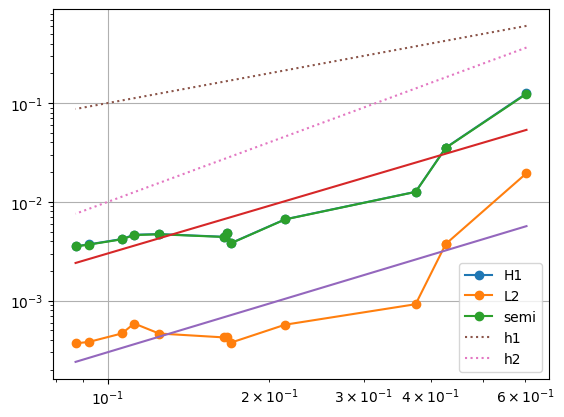

In [ ]:
# slope_H1, intercept_H1 = np.polyfit(h, H1, 1)
# slope_L2, intercept_L2 = np.polyfit(h, L2, 1)

coeffs = np.polyfit(np.log10(h), np.log10(H1), 1)
polynomial = np.poly1d(coeffs)
log10_H1_fit = polynomial(np.log10(h))

print(f"H1 rate: {coeffs[0]}")

coeffs = np.polyfit(np.log10(h), np.log10(L2), 1)
polynomial = np.poly1d(coeffs)
log10_L2_fit = polynomial(np.log10(h))

print(f"L2 rate: {coeffs[0]}")

plt.loglog(h, H1, marker='o', label='H1')
plt.loglog(h, L2, marker='o', label='L2')
plt.loglog(h, semi, marker='o', label='semi')
plt.loglog(h, 10**log10_H1_fit)
plt.loglog(h, 10**log10_L2_fit)
plt.loglog(h, h, linestyle=':', label='h1')
plt.loglog(h, h*h, linestyle=':', label='h2')
plt.grid()
plt.legend()

In [ ]:
t='DNDN'

In [ ]:
for e in t:
    if e=='N':
        print(e,'--> neumann')

N --> neumann
N --> neumann


In [16]:
import sympy as sp

# Define symbolic variables
x, y = sp.symbols('x y')

# Define a vector field function
u=sp.sin(3.2*x*(x - y)) *sp.cos(4.3*y + x) + sp.sin(4.6*(x + 2*y))*sp.cos(2.6*(y - 2*x))

mu=2 + sp.sin(x + 2*y)

sigma=sp.exp(x/2 -y/3) +2

beta1=sp.sqrt(x-y**2 +5) 
beta2=sp.sqrt(y-x**2 +5)

# Calculate the gradient
gradient_vector = [sp.diff(u, x),sp.diff(u, y)]

f =-sp.diff(mu *gradient_vector[0], x) - sp.diff(mu*gradient_vector[1], y) +beta1 *(gradient_vector[0]) +beta2*(gradient_vector[1])+sigma*u



# Display the results
print("Vector Field:", u)
print("Gradient:", gradient_vector)
print("f:", f)


Vector Field: sin(3.2*x*(x - y))*cos(x + 4.3*y) + sin(4.6*x + 9.2*y)*cos(5.2*x - 2.6*y)
Gradient: [(6.4*x - 3.2*y)*cos(3.2*x*(x - y))*cos(x + 4.3*y) - sin(3.2*x*(x - y))*sin(x + 4.3*y) - 5.2*sin(4.6*x + 9.2*y)*sin(5.2*x - 2.6*y) + 4.6*cos(4.6*x + 9.2*y)*cos(5.2*x - 2.6*y), -3.2*x*cos(3.2*x*(x - y))*cos(x + 4.3*y) - 4.3*sin(3.2*x*(x - y))*sin(x + 4.3*y) + 2.6*sin(4.6*x + 9.2*y)*sin(5.2*x - 2.6*y) + 9.2*cos(4.6*x + 9.2*y)*cos(5.2*x - 2.6*y)]
f: (sin(3.2*x*(x - y))*cos(x + 4.3*y) + sin(4.6*x + 9.2*y)*cos(5.2*x - 2.6*y))*(exp(x/2 - y/3) + 2) - (sin(x + 2*y) + 2)*(-10.24*x**2*sin(3.2*x*(x - y))*cos(x + 4.3*y) + 27.52*x*sin(x + 4.3*y)*cos(3.2*x*(x - y)) - 18.49*sin(3.2*x*(x - y))*cos(x + 4.3*y) - 91.4*sin(4.6*x + 9.2*y)*cos(5.2*x - 2.6*y) + 47.84*sin(5.2*x - 2.6*y)*cos(4.6*x + 9.2*y)) - (sin(x + 2*y) + 2)*(-40.96*(x - 0.5*y)**2*sin(3.2*x*(x - y))*cos(x + 4.3*y) - 2*(6.4*x - 3.2*y)*sin(x + 4.3*y)*cos(3.2*x*(x - y)) - sin(3.2*x*(x - y))*cos(x + 4.3*y) - 48.2*sin(4.6*x + 9.2*y)*cos(5.2*x - 2.6*

In [18]:
numerical_values = {x: 0}
print(u.subs(numerical_values))


sin(9.2*y)*cos(2.6*y)


In [19]:
numerical_values = {x: 1}
print(u.subs(numerical_values))

-sin(3.2*y - 3.2)*cos(4.3*y + 1) + sin(9.2*y + 4.6)*cos(2.6*y - 5.2)
